#Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Load the data

In [2]:
train_data=pd.read_csv('/content/train - train.csv')
train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1996,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1997,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1998,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


#Data Exploration

In [3]:
train_data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             1995 non-null   float64
 5   four_g         1995 non-null   float64
 6   int_memory     1995 non-null   float64
 7   m_dep          1995 non-null   float64
 8   mobile_wt      1996 non-null   float64
 9   n_cores        1996 non-null   float64
 10  pc             1995 non-null   float64
 11  px_height      1996 non-null   float64
 12  px_width       1998 non-null   float64
 13  ram            1998 non-null   float64
 14  sc_h           1999 non-null   float64
 15  sc_w           1999 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#copy the file to prepare the data

In [6]:
train_data_copy=train_data.copy()

#Data Splitting

In [7]:
X=train_data_copy.iloc[:,:-1]
Y=train_data_copy.iloc[:,-1]

In [8]:
# Split the data into training and testing sets before preprocessing to aviod data leakage
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



#EDA and Data preparation

In [9]:
X_train[X_train['fc'].isna()]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
371,1011,0,1.1,0,NaN,NaN,NaN,NaN,NaN,NaN,18.0,481.0,749.0,2261.0,7.0,6.0,16,1,1,1
158,1356,0,2.8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.0,1983.0,3702.0,17.0,0.0,19,0,0,0
157,1224,0,0.5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,747.0,826.0,506.0,10.0,0.0,11,1,1,1
276,1662,0,0.5,0,NaN,NaN,NaN,0.8,126.0,4.0,13.0,32.0,1509.0,3760.0,9.0,5.0,13,1,1,1


In [10]:
X_train.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               4
four_g           4
int_memory       4
m_dep            4
mobile_wt        3
n_cores          3
pc               4
px_height        3
px_width         1
ram              1
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

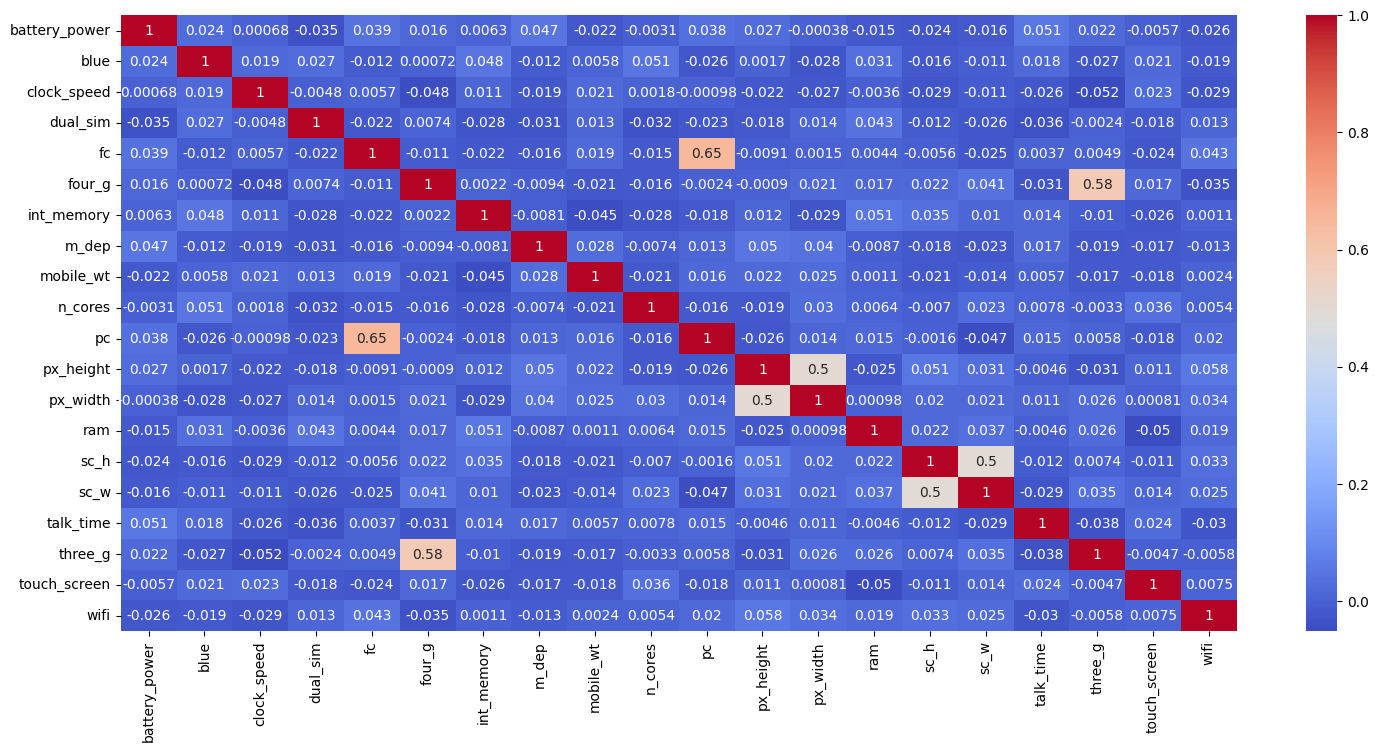

In [11]:
# # Correlation heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
def fill_missing_values(data):
    # Fill missing values in 'fc' and 'pc' columns where 'touch_screen' is equal to 0 with 0
    data.loc[(data['fc'].isna()) & (data['touch_screen'] == 0), 'fc'] = 0
    data.loc[(data['pc'].isna()) & (data['touch_screen'] == 0), 'pc'] = 0
    # Fill missing values in 'four_g' column with 0
    data['four_g'].fillna(0, inplace=True)
    # Fill missing values with median value
    median_fc = data['fc'].median()
    median_pc = data['pc'].median()
    data['fc'].fillna(median_fc, inplace=True)
    data['pc'].fillna(median_pc, inplace=True)
    # Fill missing values in 'ram' column with median value where 'price_range' is 1
    median_ram = data[data['price_range'] == 1]['ram'].median()
    data['ram'].fillna(median_ram, inplace=True)
    # Fill missing values in 'px_height', 'px_width', 'm_dep', 'mobile_wt', 'n_cores', 'sc_h', 'sc_w' columns
    # where 'price_range' is equal to 1 with mode value
    for col in ['px_height', 'px_width', 'm_dep', 'mobile_wt', 'n_cores', 'sc_h', 'sc_w']:
        mode_value = data[data['price_range'] == 1][col].mode()[0]
        data[col].fillna(mode_value, inplace=True)
    # Fill missing values in 'int_memory' column with mode value where 'fc' is equal to 0
    mode_int_memory = data[data['fc'] == 0]['int_memory'].mode()[0]
    data['int_memory'].fillna(mode_int_memory, inplace=True)
    return data.iloc[:,:-1]
data_train = pd.concat([X_train, y_train], axis=1)
data_test = pd.concat([X_test, y_test], axis=1)
X_train = fill_missing_values(data_train)
X_test = fill_missing_values(data_test)

In [13]:
# Feature scaling on the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Random Forest

In [14]:
# Evaluate the model
def print_evaluation(y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print("Random Forest Classifier Accuracy:", accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  recall= recall_score(y_test, y_pred, average='weighted')
  f1 = f1_score(y_test, y_pred, average='weighted')
  print("Random Forest Classifier Precision:", precision)
  print("Random Forest Classifier Recall:", recall)
  print("Random Forest Classifier F1-score:", f1)

In [15]:
#random forest can handle nonlinear relationships between features and the target variable.
# Additionally, it provides feature importances which can be useful for understanding which features are most important for predicting device prices
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
# Evaluate the model
print_evaluation(y_pred_rf)

Random Forest Classifier Accuracy: 0.88
Random Forest Classifier Precision: 0.8847569562419281
Random Forest Classifier Recall: 0.88
Random Forest Classifier F1-score: 0.8810107039859844


#Gradient Boosting

In [16]:
# It typically yields high performance and can handle outliers and noise in the data effectively
# Initialize and train Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test)
# Evaluate the model
print_evaluation(y_pred_gb)


Random Forest Classifier Accuracy: 0.9025
Random Forest Classifier Precision: 0.9040765254555012
Random Forest Classifier Recall: 0.9025
Random Forest Classifier F1-score: 0.9030386994885916


#SVM

In [17]:
#SVM can be effective for this task if there are clear boundaries between different price ranges.
# It works well for binary classification tasks and can be extended to multiclass classification using techniques like one-vs-rest or one-vs-one
# Initialize and train Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test)
# Evaluate the model
print_evaluation(y_pred_svm)


Random Forest Classifier Accuracy: 0.9725
Random Forest Classifier Precision: 0.9736388888888888
Random Forest Classifier Recall: 0.9725
Random Forest Classifier F1-score: 0.9725892174672662


#try on scaled data

In [18]:
#try it on scaled data
rf_classifier.fit(X_train_scaled, y_train)
y_pred_rf = rf_classifier.predict(X_test_scaled)
# Evaluate the model
print_evaluation(y_pred_rf)

Random Forest Classifier Accuracy: 0.88
Random Forest Classifier Precision: 0.8847569562419281
Random Forest Classifier Recall: 0.88
Random Forest Classifier F1-score: 0.8810107039859844


In [19]:
# Initialize and train Gradient Boosting Classifier
gb_classifier.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_gb = gb_classifier.predict(X_test_scaled)
# Evaluate the model
print_evaluation(y_pred_gb)


Random Forest Classifier Accuracy: 0.9025
Random Forest Classifier Precision: 0.9040765254555012
Random Forest Classifier Recall: 0.9025
Random Forest Classifier F1-score: 0.9030386994885916


In [20]:
# Initialize and train Support Vector Machine Classifier
svm_classifier.fit(X_train_scaled, y_train)
# Predict on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)
# Evaluate the model
print_evaluation(y_pred_svm)


Random Forest Classifier Accuracy: 0.965
Random Forest Classifier Precision: 0.9676319201469019
Random Forest Classifier Recall: 0.965
Random Forest Classifier F1-score: 0.965240861853736


#model accuracy decreased on scaled data

In [21]:
test_data=pd.read_csv('/content/test - test.csv')

In [22]:
test_data.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [23]:
test_data.drop('id',inplace=True,axis=1)

In [24]:
test_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [25]:
test_data_scalled = scaler.transform(test_data)

In [26]:
y_pred_rf_test = rf_classifier.predict(test_data_scalled[:10,:])
y_pred_rf_test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [27]:
y_pred_gb_test = gb_classifier.predict(test_data_scalled[:10,:])
y_pred_gb_test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

In [28]:
y_pred_svm_test = svm_classifier.predict(test_data_scalled[:10,:])
y_pred_svm_test

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0])

#optimizing training process with performing hyperparameter tuning using Grid Search Cross-Validation to find the best combination of hyperparameters for our model

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize Random Forest Classifier
rf_classifier_optimized = RandomForestClassifier(random_state=42)

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf_classifier_optimized, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train the model with the best parameters
rf_classifier_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_classifier_optimized.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf_optimized = rf_classifier_optimized.predict(X_test_scaled)

# Evaluate the optimized model
accuracy_rf_optimized = accuracy_score(y_test, y_pred_rf_optimized)
print("Random Forest Classifier (Optimized) Accuracy:", accuracy_rf_optimized)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

KeyboardInterrupt: 